In [2]:
pip install scikit-learn==0.24.2

  Using cached scikit_learn-0.24.2-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.3 requires scikit-learn==0.23.2, but you have scikit-learn 0.24.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [143]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import math

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFE, SelectFromModel 
from sklearn.svm import LinearSVR

import torch 
import torch.nn as nn 
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')

In [144]:
driver_ride_assignment = pd.read_csv("/home/moni/Desktop/Pathao Assignment/driver_ride_assignments.csv")
monthly_completed_trip = pd.read_csv("/home/moni/Desktop/Pathao Assignment/monthly_completed_trip.csv")
row_request_dataset = pd.read_csv("/home/moni/Desktop/Pathao Assignment/raw_request_dataset.csv")

# Shape and Head of the datasets 

In [145]:
print("Shape of driver_ride_assignment is :{}".format(driver_ride_assignment.shape))
driver_ride_assignment.head()

Shape of driver_ride_assignment is :(238559, 2)


,ride_id,driver_id
0,78A5D3,4922405
1,78A5D3,5332197
2,78A604,5303157
3,78A604,3355215
4,78A604,5265495


In [146]:
print("Shape of monthly_comleted_trip is :{}".format(monthly_completed_trip.shape))
monthly_completed_trip.head()

Shape of monthly_comleted_trip is :(4797, 2)


,driver_id,total_monthly_trips
0,4700650,102
1,5160519,336
2,4712145,183
3,5334092,63
4,5124702,274


In [147]:
print("Shape of row_request_dataset is :{}".format(row_request_dataset.shape))
row_request_dataset.head()

Shape of row_request_dataset is :(106139, 11)


,day_of_week,Hour,Minute,ride_id,passenger_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status
0,1,5,48,78A5RS,4194635,5271687,121.0,NaN,651.0,6077.0,COMPLETED
1,1,7,37,78A9FQ,5390069,3801157,116.0,NaN,1375.0,5733.0,COMPLETED
2,1,7,47,78AACQ,3750224,5102685,194.0,4.0,1566.0,10913.0,COMPLETED
3,1,8,27,78AFLP,4419899,4869168,66.0,1.0,306.0,2430.0,COMPLETED
4,1,8,41,78AIEB,3802452,2928777,130.0,5.0,1088.0,6686.0,COMPLETED


# 2  Some Analysis of the datasets

###  2.1  driver_ride_assignment dataset 

In [148]:
# Checking null values
driver_ride_assignment.isnull().sum()

ride_id      0
driver_id    0
dtype: int64

In [149]:
# Total number of unique drive 
print("Total number of unique drivers are :{}".format(driver_ride_assignment['driver_id'].nunique()))

Total number of unique drivers are :3538


In [150]:
a = driver_ride_assignment.groupby(['driver_id']).apply(lambda x: x['ride_id'].unique())
driver_ride_assignment_df = pd.DataFrame({"driver_id": a.index, "total_ride_id": a.values}  )
driver_ride_assignment_df

,driver_id,total_ride_id
0,2869108,[78TN7S]
1,2869204,"[78RD6L, 791LGK, 78LTOP, 791F5C, 78B2GS, 78B5I..."
2,2869278,"[797G7D, 797EO6, 797EA9, 78JSIE, 78OHDN, 797EA..."
3,2870173,"[78B3SO, 78CQ6F, 78D4K2, 78D7KB, 796B4R, 78CG7..."
4,2886584,"[7.97E+10, 790IQ9, 7971NM, 797MEK, 796KBA, 797..."
...,...,...
3533,5441296,"[799PFD, 799PIQ, 79AD4K, 79A4GK]"
3534,5441518,"[799NM5, 799M6J, 799M3J, 79BCCT, 79AEIT, 79A8Q..."
3535,5441667,"[799LD1, 799Q50, 79A6LP, 79A7QK]"
3536,5441669,"[799LD1, 799ISO, 799IT4, 799LJI]"


###  2.2  monthly_completed_trip

In [151]:
# Checking null values 
monthly_completed_trip.isnull().sum() 

driver_id              0
total_monthly_trips    0
dtype: int64

In [152]:
monthly_completed_trip_df = monthly_completed_trip.sort_values('total_monthly_trips', ascending=False).reset_index(drop=True)
monthly_completed_trip_df.head()

,driver_id,total_monthly_trips
0,5221083,620
1,4598077,572
2,5255479,529
3,5026569,497
4,4834241,494


###  2.3  row_request_dataset 

In [153]:
# Checking null values  
row_request_dataset.isnull().sum()

day_of_week              0
Hour                     0
Minute                   0
ride_id                  0
passenger_id             0
driver_id                0
undiscounted_fare    49600
rating               78212
ride_duration        49586
ride_distance        49600
status                   0
dtype: int64

In [154]:
print("Number of unique ride_id is :{}".format(row_request_dataset['ride_id'].nunique()))
print("Number of unique passenger_id is :{}".format(row_request_dataset['passenger_id'].nunique()))
print("Numer of unique driver_id is :{}".format(row_request_dataset['driver_id'].nunique()))

Number of unique ride_id is :106071
Number of unique passenger_id is :30332
Numer of unique driver_id is :3000


Text(0, 0.5, 'Number of ride status')

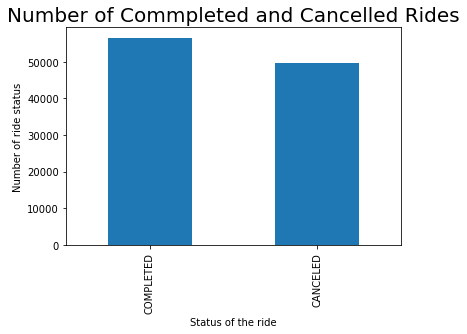

In [155]:
row_request_dataset['status'].value_counts().plot(kind='bar')
plt.title("Number of Commpleted and Cancelled Rides", fontsize=20)
plt.xlabel("Status of the ride")
plt.ylabel("Number of ride status")

# Part 1 Exploratory Data Analysis

### a)

<AxesSubplot:title={'center':'Request Volume Changes Over Time'}, xlabel='Days', ylabel='Total number of request volume'>

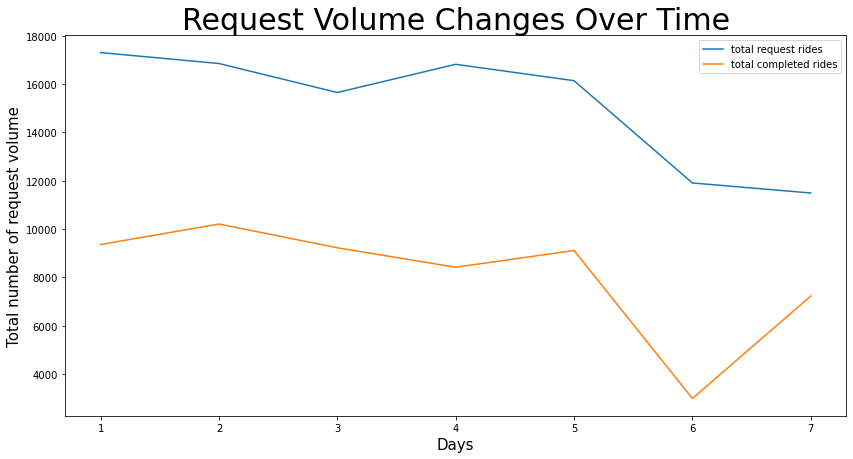

In [156]:
day_rides_total = row_request_dataset['day_of_week'].value_counts()
day_rides_total_x = day_rides_total.index
day_rides_total_y = day_rides_total.values

row_request_dataset_completed = row_request_dataset[row_request_dataset['status']=="COMPLETED"] 
day_rides_completed_total = row_request_dataset_completed['day_of_week'].value_counts()
day_rides_completed_total_x = day_rides_completed_total.index
day_rides_completed_total_y = day_rides_completed_total.values

plt.figure(figsize=(14, 7))
sns.lineplot(x=day_rides_total_x, y=day_rides_total_y, label='total request rides')
plt.title("Request Volume Changes Over Time", fontsize=30)
plt.xlabel("Days", fontsize=15) 
plt.ylabel("Total number of request volume", fontsize=15)

sns.lineplot(x=day_rides_completed_total_x, y=day_rides_completed_total_y, label='total completed rides')

##### Initially We can say that Request Valume is an Accurate Measure of Demand but there are lots of thing like time, place also depends on. For example, in different time in different place number of request valume is defferent. It also depends on the driver's density. 

Text(0, 0.5, 'Completion rate')

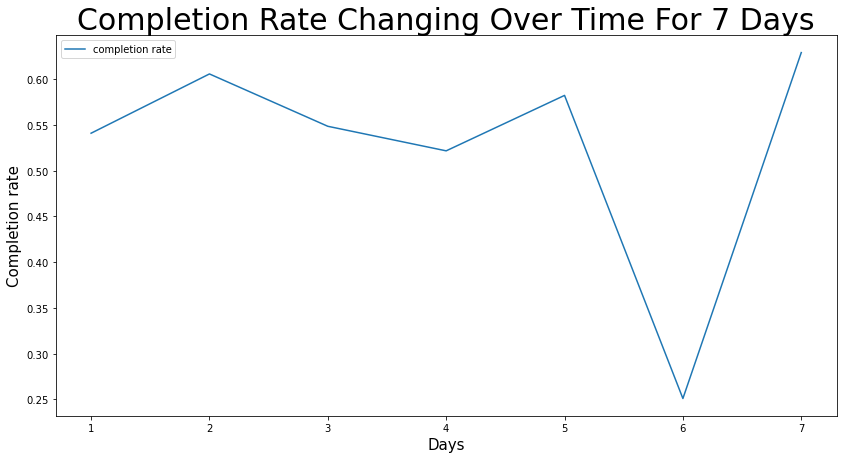

In [157]:
row_request_dataset_completed = row_request_dataset[row_request_dataset['status']=='COMPLETED'] 
row_request_dataset_completed_total = row_request_dataset_completed.groupby('day_of_week')['status'].agg('count')

row_request_dataset_total = row_request_dataset['day_of_week'].value_counts()

x = []
y = []
for i, (c, t) in enumerate(zip(row_request_dataset_completed_total.values, row_request_dataset_total.values)): 
    v = c/t
    x.append(i+1)
    y.append(v)

plt.figure(figsize=(14, 7))
sns.lineplot(x=x, y=y, label='completion rate')
plt.title("Completion Rate Changing Over Time For 7 Days", fontsize=30)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Completion rate", fontsize=15)

In [158]:
row_request_dataset.head()

,day_of_week,Hour,Minute,ride_id,passenger_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status
0,1,5,48,78A5RS,4194635,5271687,121.0,NaN,651.0,6077.0,COMPLETED
1,1,7,37,78A9FQ,5390069,3801157,116.0,NaN,1375.0,5733.0,COMPLETED
2,1,7,47,78AACQ,3750224,5102685,194.0,4.0,1566.0,10913.0,COMPLETED
3,1,8,27,78AFLP,4419899,4869168,66.0,1.0,306.0,2430.0,COMPLETED
4,1,8,41,78AIEB,3802452,2928777,130.0,5.0,1088.0,6686.0,COMPLETED


<AxesSubplot:title={'center':'First Days Total Request and Completed Trips'}, xlabel='Hours', ylabel='Number of ride'>

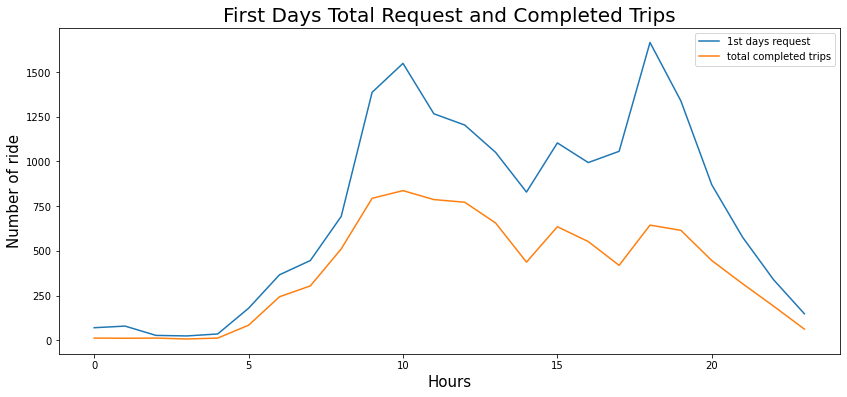

In [159]:
f_d = row_request_dataset[row_request_dataset['day_of_week']==1] 
days_count = f_d['Hour'].value_counts() 
plt.figure(figsize=(14, 6)) 
sns.lineplot(x=days_count.index, y=days_count.values, label='1st days request')
plt.title("First Days Total Request and Completed Trips", fontsize=20) 
plt.xlabel("Hours", fontsize=15) 
plt.ylabel("Number of ride", fontsize=15) 

f_d = row_request_dataset[row_request_dataset['day_of_week']==1]
f_d_completed = f_d[f_d['status']=='COMPLETED']
days_count_completed = f_d_completed['Hour'].value_counts() 
sns.lineplot(x=days_count_completed.index, y=days_count_completed.values, label='total completed trips')

<AxesSubplot:title={'center':'Third Days Total Request and Completed Trips'}, xlabel='Hours', ylabel='Number of rides'>

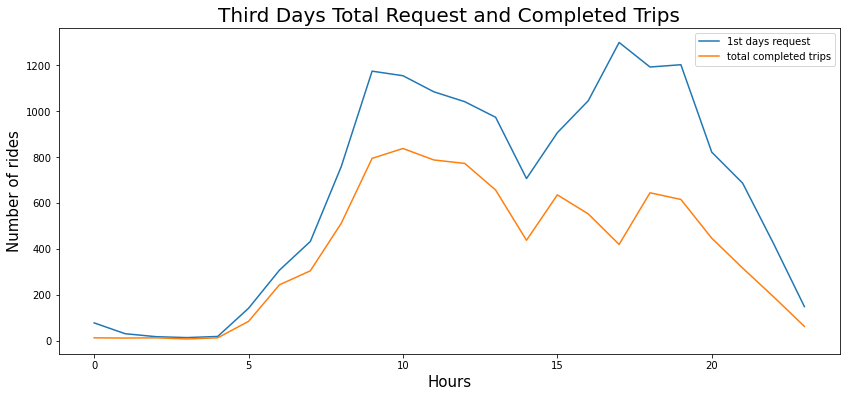

In [160]:
t_d = row_request_dataset[row_request_dataset['day_of_week']==3] 
days_count = t_d['Hour'].value_counts() 
plt.figure(figsize=(14, 6)) 
sns.lineplot(x=days_count.index, y=days_count.values, label='1st days request')
plt.title("Third Days Total Request and Completed Trips", fontsize=20) 
plt.xlabel("Hours", fontsize=15) 
plt.ylabel("Number of rides", fontsize=15) 

t_d = row_request_dataset[row_request_dataset['day_of_week']==1]
t_d_completed = t_d[t_d['status']=='COMPLETED']
days_count_completed = t_d_completed['Hour'].value_counts() 
sns.lineplot(x=days_count_completed.index, y=days_count_completed.values, label='total completed trips')

### b)

In [161]:
monthly_completed_trip_df 

,driver_id,total_monthly_trips
0,5221083,620
1,4598077,572
2,5255479,529
3,5026569,497
4,4834241,494
...,...,...
4792,5361528,1
4793,4869187,1
4794,4566126,1
4795,4804583,1


In [162]:
row_request_dataset 

,day_of_week,Hour,Minute,ride_id,passenger_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status
0,1,5,48,78A5RS,4194635,5271687,121.0,NaN,651.0,6077.0,COMPLETED
1,1,7,37,78A9FQ,5390069,3801157,116.0,NaN,1375.0,5733.0,COMPLETED
2,1,7,47,78AACQ,3750224,5102685,194.0,4.0,1566.0,10913.0,COMPLETED
3,1,8,27,78AFLP,4419899,4869168,66.0,1.0,306.0,2430.0,COMPLETED
4,1,8,41,78AIEB,3802452,2928777,130.0,5.0,1088.0,6686.0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...
106134,2,21,17,78J3T8,3460746,4264488,102.0,NaN,653.0,4205.0,COMPLETED
106135,3,19,24,78NKSM,5204571,5036894,102.0,1.0,801.0,4794.0,COMPLETED
106136,4,8,57,78P3LT,3784205,4650483,102.0,5.0,773.0,5046.0,COMPLETED
106137,5,12,43,790E9J,3665897,5250341,102.0,3.0,645.0,3999.0,COMPLETED


In [163]:
row_request_dataset_simple = row_request_dataset.loc[:, ["ride_id", "driver_id", "undiscounted_fare", "rating", "ride_duration", "ride_distance", "status"]] 
row_request_dataset_simple["status"] = row_request_dataset_simple['status'].map({"COMPLETED":1, "CANCELED":0})
m = row_request_dataset_simple.merge(monthly_completed_trip_df, on='driver_id', how='left')
print("Shape of m is :{}".format(m.shape))
m.head() 

Shape of m is :(106139, 8)


,ride_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status,total_monthly_trips
0,78A5RS,5271687,121.0,NaN,651.0,6077.0,1,228.0
1,78A9FQ,3801157,116.0,NaN,1375.0,5733.0,1,51.0
2,78AACQ,5102685,194.0,4.0,1566.0,10913.0,1,316.0
3,78AFLP,4869168,66.0,1.0,306.0,2430.0,1,101.0
4,78AIEB,2928777,130.0,5.0,1088.0,6686.0,1,180.0


In [164]:
dic = {"driver_id": [], "ACR": []}
unique_driver = m['driver_id'].unique()

for d_i in unique_driver:
    total_assign_request = len(m[m['driver_id']==d_i])
    driver_total_request = m[m['driver_id']==d_i]
    driver_total_completed_trip = len(driver_total_request[driver_total_request['status']==1]) 
    
    dic['driver_id'].append(d_i)
    dic['ACR'].append(driver_total_completed_trip / total_assign_request)
    
assignment_completion_ratio = pd.DataFrame(dic)
print("Shape of df is :{}".format(assignment_completion_ratio.shape))
assignment_completion_ratio.head()

Shape of df is :(3000, 2)


,driver_id,ACR
0,5271687,0.830508
1,3801157,0.684211
2,5102685,0.789474
3,4869168,0.875000
4,2928777,0.569444


In [165]:
m_assignment_completion_ratio = m.merge(assignment_completion_ratio, on='driver_id', how='left')
print("Shape of m_assignment_completion_ratio is :{}".format(m_assignment_completion_ratio.shape))
m_assignment_completion_ratio.head() 

Shape of m_assignment_completion_ratio is :(106139, 9)


,ride_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status,total_monthly_trips,ACR
0,78A5RS,5271687,121.0,NaN,651.0,6077.0,1,228.0,0.830508
1,78A9FQ,3801157,116.0,NaN,1375.0,5733.0,1,51.0,0.684211
2,78AACQ,5102685,194.0,4.0,1566.0,10913.0,1,316.0,0.789474
3,78AFLP,4869168,66.0,1.0,306.0,2430.0,1,101.0,0.875000
4,78AIEB,2928777,130.0,5.0,1088.0,6686.0,1,180.0,0.569444


In [166]:
m_assignment_completion_ratio.drop_duplicates(inplace=True)

m_assignment_completion_ratio.sort_values(['total_monthly_trips', 'ACR'], ascending=False, inplace=True)

m_assignment_completion_ratio['rating'].fillna((m_assignment_completion_ratio['rating'].mean()), inplace=True)
m_assignment_completion_ratio['total_monthly_trips'].fillna((m_assignment_completion_ratio['total_monthly_trips'].mean()), inplace=True)

m_assignment_completion_ratio = m_assignment_completion_ratio.reset_index(drop=True)

print("Shape of m_assignment_completion_ratio is :{}".format(m_assignment_completion_ratio.shape))
m_assignment_completion_ratio.head()

Shape of m_assignment_completion_ratio is :(106127, 9)


,ride_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status,total_monthly_trips,ACR
0,78JE42,5221083,136.0,4.307623,860.0,6268.0,1,620.0,0.655172
1,78NN8N,5221083,63.0,5.000000,433.0,2171.0,1,620.0,0.655172
2,78T3DE,5221083,157.0,4.307623,1145.0,8474.0,1,620.0,0.655172
3,78P8KB,5221083,120.0,5.000000,1074.0,6009.0,1,620.0,0.655172
4,7989RM,5221083,104.0,4.000000,1002.0,4918.0,1,620.0,0.655172


In [167]:
driver_performance_dict = {"driver_id": [], "rating": [], "status": [], "ACR": [], "total_monthly_trips": []}

a = m_assignment_completion_ratio.groupby('driver_id')['rating'].agg('mean') 
b = m_assignment_completion_ratio.groupby('driver_id')['status'].agg('mean') 
c = m_assignment_completion_ratio.groupby('driver_id')['ACR'].agg('mean') 
d = m_assignment_completion_ratio.groupby('driver_id')['total_monthly_trips'].agg('mean') 

for i in range(len(a)): 
    driver_performance_dict['driver_id'].append(a.index[i])
    driver_performance_dict['rating'].append(a.values[i])
    driver_performance_dict['status'].append(b.values[i])
    driver_performance_dict['ACR'].append(c.values[i])
    driver_performance_dict['total_monthly_trips'].append(d.values[i])

individual_performance_profiles = pd.DataFrame(driver_performance_dict)
print('Shape of driver_per is :{}'.format(individual_performance_profiles.shape))
individual_performance_profiles.head() 

Shape of driver_per is :(3000, 5)


,driver_id,rating,status,ACR,total_monthly_trips
0,0,4.307623,0.000000,0.000000,152.861595
1,2869204,4.425494,0.851064,0.851064,217.000000
2,2869278,4.307623,0.000000,0.000000,21.000000
3,2870173,4.293512,0.387755,0.387755,59.000000
4,2886584,4.477424,0.913793,0.913793,151.000000


Text(0.5, 1.0, 'Relations between rating and total_monthly_trips')

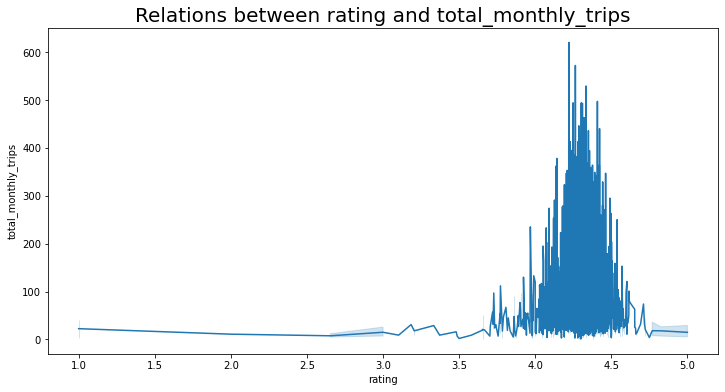

In [168]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=individual_performance_profiles, x='rating', y='total_monthly_trips')
plt.title("Relations between rating and total_monthly_trips", fontsize=20)

Text(0.5, 1.0, 'Relations between status and total_monthly_trips')

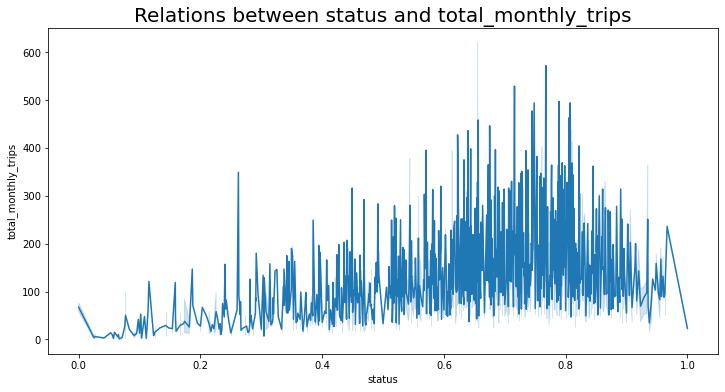

In [169]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=individual_performance_profiles, x='status', y='total_monthly_trips')
plt.title("Relations between status and total_monthly_trips", fontsize=20)

Text(0.5, 1.0, 'Relations between ACR and total_monthly_trips')

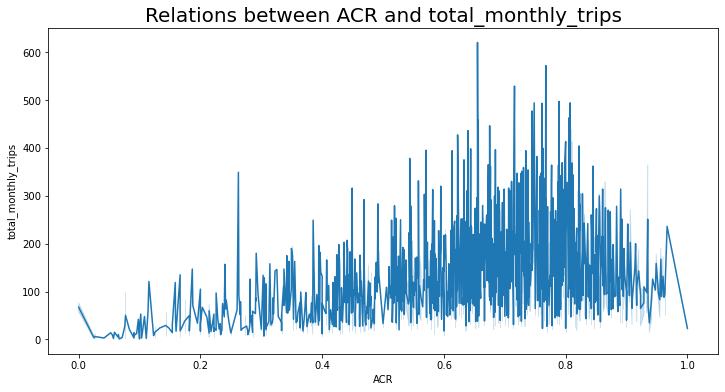

In [170]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=individual_performance_profiles, x='ACR', y='total_monthly_trips')
plt.title("Relations between ACR and total_monthly_trips", fontsize=20)

Text(0.5, 1.0, 'Relations between status and rating')

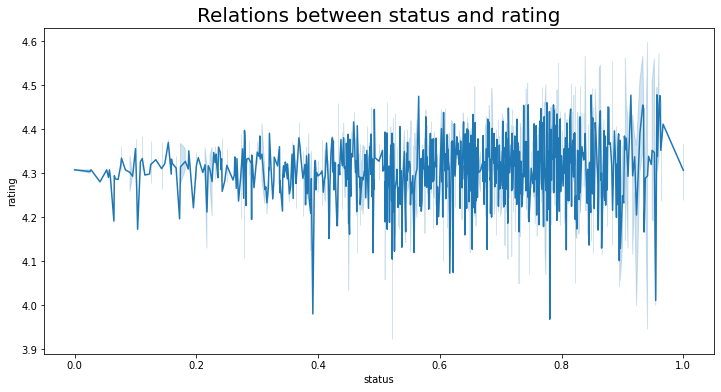

In [171]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=individual_performance_profiles, x='status', y='rating')
plt.title("Relations between status and rating", fontsize=20)

Text(0.5, 1.0, 'Relations between ACR and rating')

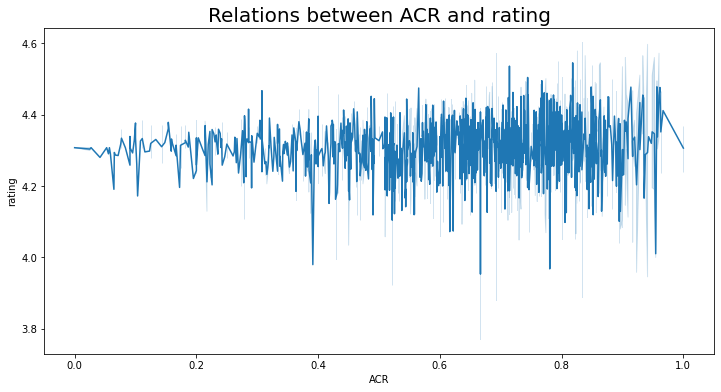

In [172]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=individual_performance_profiles, x='ACR', y='rating')
plt.title("Relations between ACR and rating", fontsize=20)

Text(0.5, 1.0, 'Relations between ACR and status')

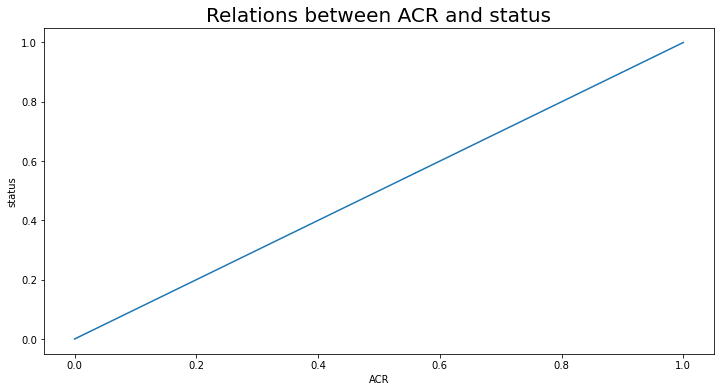

In [173]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=individual_performance_profiles, x='ACR', y='status')
plt.title("Relations between ACR and status", fontsize=20)

# Part 2 Predictive Modeling 

In [174]:
monthly_completed_trip

,driver_id,total_monthly_trips
0,4700650,102
1,5160519,336
2,4712145,183
3,5334092,63
4,5124702,274
...,...,...
4792,5347410,1
4793,3349614,1
4794,4093745,1
4795,4934363,1


In [175]:
row_request_dataset

,day_of_week,Hour,Minute,ride_id,passenger_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status
0,1,5,48,78A5RS,4194635,5271687,121.0,NaN,651.0,6077.0,COMPLETED
1,1,7,37,78A9FQ,5390069,3801157,116.0,NaN,1375.0,5733.0,COMPLETED
2,1,7,47,78AACQ,3750224,5102685,194.0,4.0,1566.0,10913.0,COMPLETED
3,1,8,27,78AFLP,4419899,4869168,66.0,1.0,306.0,2430.0,COMPLETED
4,1,8,41,78AIEB,3802452,2928777,130.0,5.0,1088.0,6686.0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...
106134,2,21,17,78J3T8,3460746,4264488,102.0,NaN,653.0,4205.0,COMPLETED
106135,3,19,24,78NKSM,5204571,5036894,102.0,1.0,801.0,4794.0,COMPLETED
106136,4,8,57,78P3LT,3784205,4650483,102.0,5.0,773.0,5046.0,COMPLETED
106137,5,12,43,790E9J,3665897,5250341,102.0,3.0,645.0,3999.0,COMPLETED


### Columns Preprocessing

In [176]:
def preprocessing_function(monthly_completed_trip, row_request_dataset):
    mct_rrd_merged = monthly_completed_trip .merge(row_request_dataset, on='driver_id', how='left').reset_index(drop=True)
    mct_rrd_merged.dropna(inplace=True)
    mct_rrd_merged['status'] = mct_rrd_merged['status'].map({"COMPLETED":1, "CANCELED":0})
    mct_rrd_merged = mct_rrd_merged.reset_index(drop=True)
    mct_rrd_merged.drop(['driver_id', 'ride_id', 'passenger_id'], axis=1, inplace=True)
    
    return mct_rrd_merged
    

In [177]:
preprocesses_df = preprocessing_function(monthly_completed_trip, row_request_dataset)
print("Shape of preprocesses_df is :{}".format(preprocesses_df.shape))
preprocesses_df.head() 

Shape of preprocesses_df is :(27924, 9)


,total_monthly_trips,day_of_week,Hour,Minute,undiscounted_fare,rating,ride_duration,ride_distance,status
0,102,2.0,8.0,52.0,132.0,4.0,1464.0,6775.0,1
1,102,1.0,10.0,45.0,78.0,5.0,419.0,3170.0,1
2,102,1.0,10.0,6.0,85.0,5.0,564.0,3655.0,1
3,336,2.0,19.0,40.0,93.0,5.0,922.0,4194.0,1
4,336,1.0,10.0,14.0,139.0,4.0,1113.0,7254.0,1


### Outlier Detection and Removing

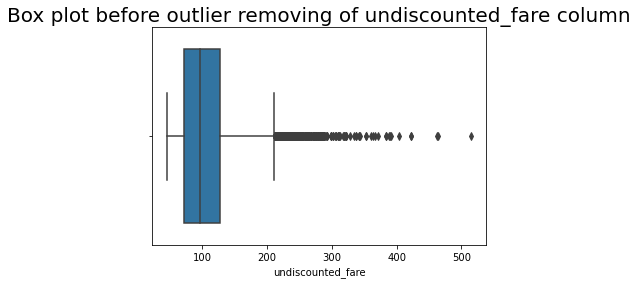

In [178]:
sns.boxplot(preprocesses_df['undiscounted_fare'])
plt.title("Box plot before outlier removing of undiscounted_fare column", fontsize=20) 
plt.show() 

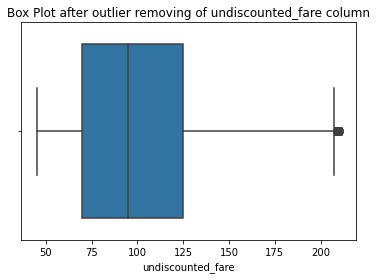

In [179]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(preprocesses_df, 'undiscounted_fare')
sns.boxplot(preprocesses_df['undiscounted_fare'])
plt.title("Box Plot after outlier removing of undiscounted_fare column")
plt.show()

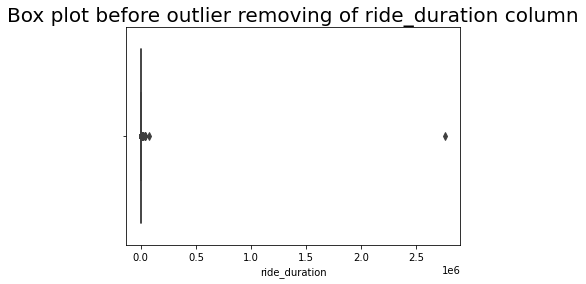

In [180]:
sns.boxplot(preprocesses_df['ride_duration']) 
plt.title("Box plot before outlier removing of ride_duration column", fontsize=20)  
plt.show() 

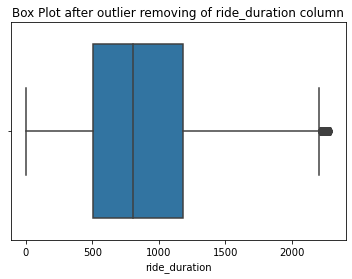

In [181]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(preprocesses_df, 'ride_duration')
sns.boxplot(preprocesses_df['ride_duration'])
plt.title("Box Plot after outlier removing of ride_duration column")
plt.show()

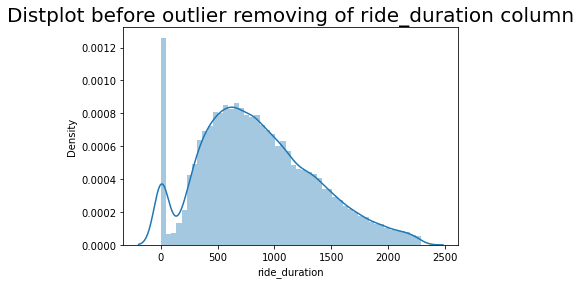

In [182]:
sns.distplot(preprocesses_df['ride_duration'])
plt.title("Distplot before outlier removing of ride_duration column", fontsize=20)  
plt.show() 

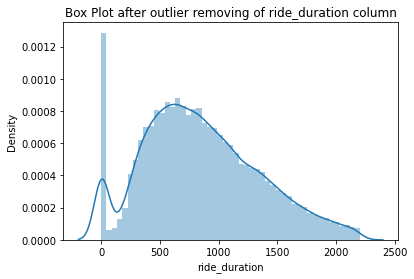

In [183]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(preprocesses_df, 'ride_duration')
sns.distplot(preprocesses_df['ride_duration'])
plt.title("Box Plot after outlier removing of ride_duration column")
plt.show()

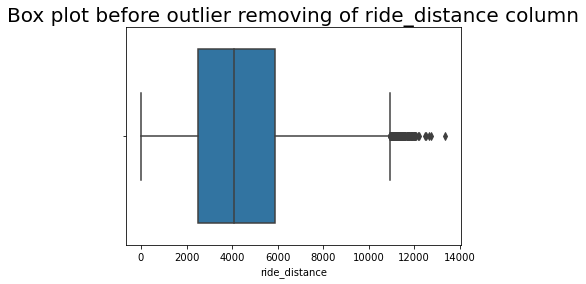

In [184]:
sns.boxplot(preprocesses_df['ride_distance'])
plt.title("Box plot before outlier removing of ride_distance column", fontsize=20)  
plt.show()

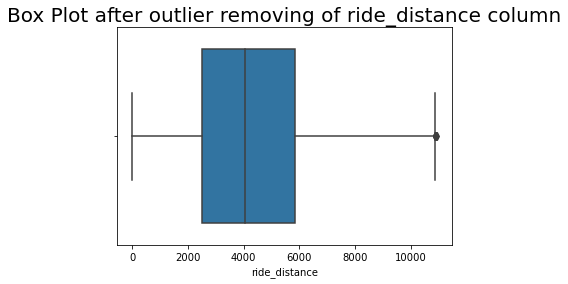

In [185]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(preprocesses_df, 'ride_distance')
sns.boxplot(preprocesses_df['ride_distance'])
plt.title("Box Plot after outlier removing of ride_distance column", fontsize=20)
plt.show()

In [186]:
print("Shape after removing outlier :{}".format(preprocesses_df.shape)) 

Shape after removing outlier :(26522, 9)


### Feature Engineering

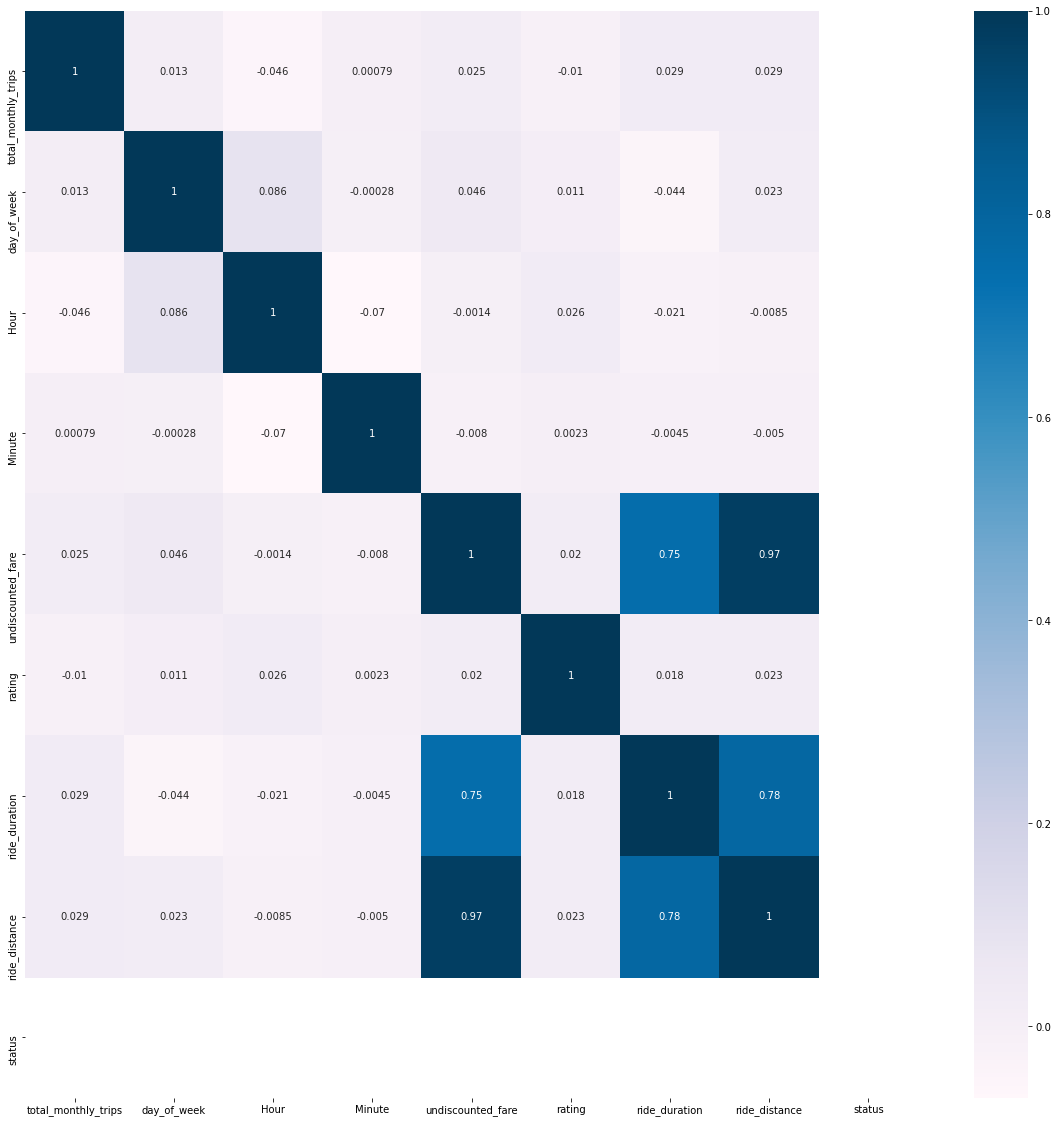

In [187]:
plt.figure(figsize=(20, 20))
cor = preprocesses_df.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [188]:
X = preprocesses_df.drop(['total_monthly_trips'], axis=1) 
Y = preprocesses_df['total_monthly_trips']
print("Shape of X is :{} \nShape of Y is :{}".format(X.shape, Y.shape))

Shape of X is :(26522, 8) 
Shape of Y is :(26522,)


In [189]:
def fit_model(X, Y): 
    model = LinearRegression()
    model.fit(X, Y)
    
    return model

In [190]:
def calculate_metrics(model, X_test_scaled, Y_test): 
    y_predict_r = model.predict(X_test_scaled)
    
    # calculating error 
    MSE = mean_squared_error(Y_test, y_predict_r)
    MAE = mean_absolute_error(Y_test, y_predict_r)
    RMSE = math.sqrt(mean_squared_error(Y_test, y_predict_r))
    R2 = r2_score(Y_test, y_predict_r)
    #RMSLE = math.sqrt(mean_squared_log_error(Y_test, y_predict_r))
    MAPE = math.sqrt(mean_absolute_percentage_error(Y_test, y_predict_r))
    
    return MSE, MAE, RMSE, R2, MAPE

In [191]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
    
    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)
    
    # Make predictions on test dataset and calculate metrics.
    MSE, MAE, RMSE, R2, MAPE = calculate_metrics(model, X_test_scaled, Y_test)
    
    return MSE, MAE, RMSE, R2, MAPE

In [192]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    MSE, MAE, RMSE, R2, MAPE = train_and_get_metrics(X, Y)
    
    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[MSE, MAE, RMSE, R2, MAPE, X.shape[1]]], columns=["MSE", "MAE", "RMSE", "R2", "MAPE", 'Feature Count'])
    
    return display_df

In [193]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()


,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,11839.843291,86.044276,108.811044,0.003597,1.261476,8


In [194]:
# Get the absolute value of the correlation
cor_target = abs(cor.iloc[:, 0])

# Select highly correlated features (thresold = 0.3)
relevant_features = cor_target[cor_target>0.005]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('total_monthly_trips')

# Display the results
print(names)

['day_of_week', 'Hour', 'undiscounted_fare', 'rating', 'ride_duration', 'ride_distance']


In [195]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(preprocesses_df[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,11839.843291,86.044276,108.811044,0.003597,1.261476,8
Strong features,11725.355504,86.242077,108.283681,0.001374,1.341893,6


### Correlation with other features

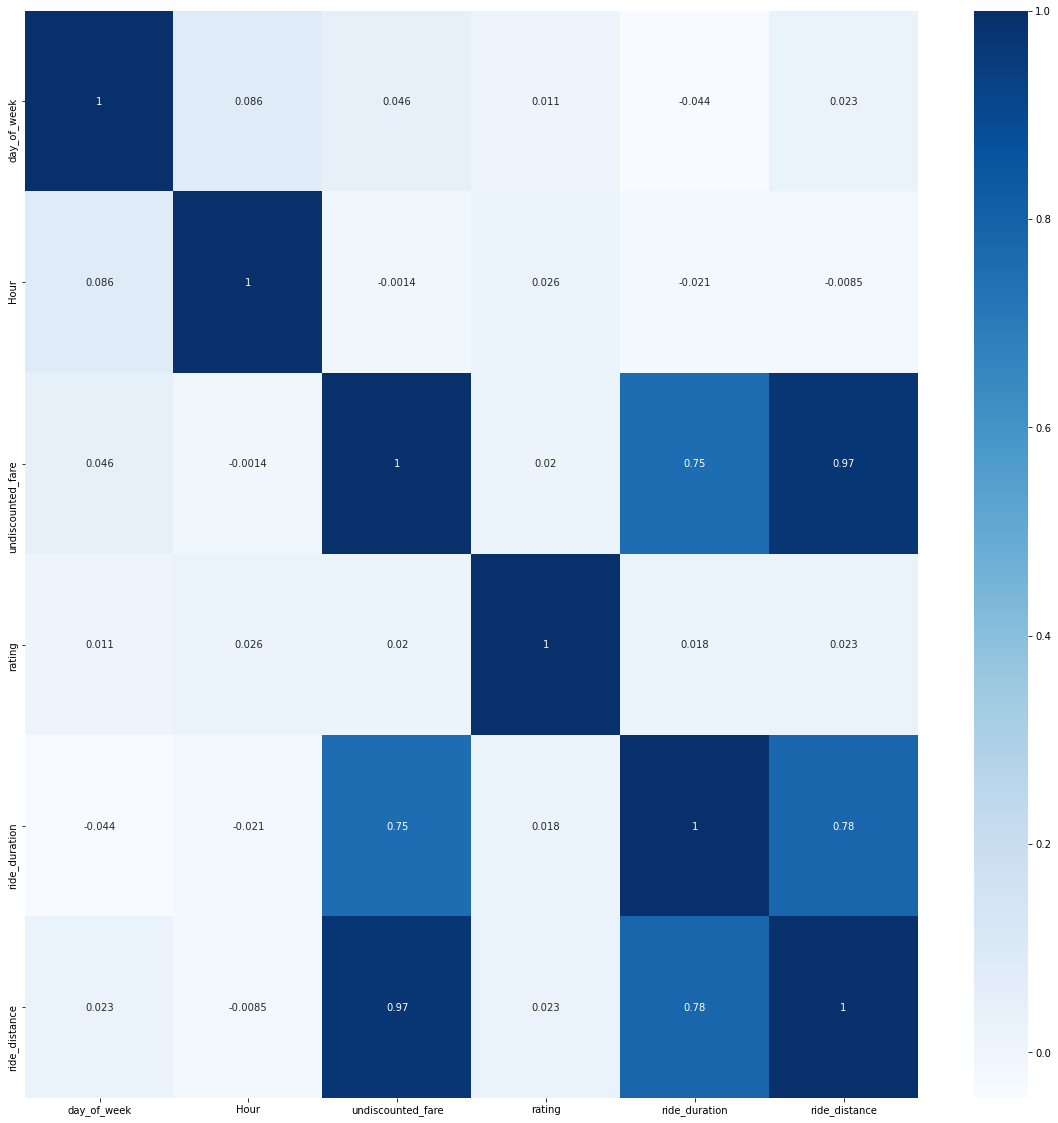

In [196]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
new_corr = preprocesses_df[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [197]:
# Get the absolute value of the correlation
cor_target = abs(cor.iloc[:, 0])

# Select highly correlated features (thresold = 0.4)
relevant_features = cor_target[cor_target>0.02]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('total_monthly_trips')

# Display the results
print(names)

['Hour', 'undiscounted_fare', 'ride_duration', 'ride_distance']


In [198]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(preprocesses_df[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,11839.843291,86.044276,108.811044,0.003597,1.261476,8
Strong features,11725.355504,86.242077,108.283681,0.001374,1.341893,6
Strong features,12124.245683,87.283080,110.110152,0.001399,1.323174,4


### Univariate Selection with Sci-Kit Learn

In [199]:
def univariate_selection():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_regression, k=6)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(preprocesses_df.drop('total_monthly_trips', 1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = preprocesses_df.drop('total_monthly_trips', 1 ).columns[feature_idx]
    
    return feature_names

In [200]:
univariate_feature_names = univariate_selection()

day_of_week: True
Hour: True
Minute: False
undiscounted_fare: True
rating: True
ride_duration: True
ride_distance: True
status: False


In [201]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(preprocesses_df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,11839.843291,86.044276,108.811044,0.003597,1.261476,8
Strong features,11725.355504,86.242077,108.283681,0.001374,1.341893,6
Strong features,12124.245683,87.283080,110.110152,0.001399,1.323174,4
F-test,11640.152534,85.749246,107.889539,0.000820,1.207247,6


### Wrapper Methods

##### Recursive Feature Elimination

In [202]:
def run_rfe():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = RandomForestRegressor(random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(model, 7)
    
    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = preprocesses_df.drop('total_monthly_trips', 1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()
rfe_feature_names


Index(['day_of_week', 'Hour', 'Minute', 'undiscounted_fare', 'rating',
       'ride_duration', 'ride_distance'],
      dtype='object')

In [203]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(preprocesses_df[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = results.append(rfe_eval_df)
results.head(n=10)


,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,11839.843291,86.044276,108.811044,0.003597,1.261476,8
Strong features,11725.355504,86.242077,108.283681,0.001374,1.341893,6
Strong features,12124.245683,87.283080,110.110152,0.001399,1.323174,4
F-test,11640.152534,85.749246,107.889539,0.000820,1.207247,6
RFE,11918.678933,86.253171,109.172702,0.005184,1.314637,7


### Embedded Methods

##### Feature Importances

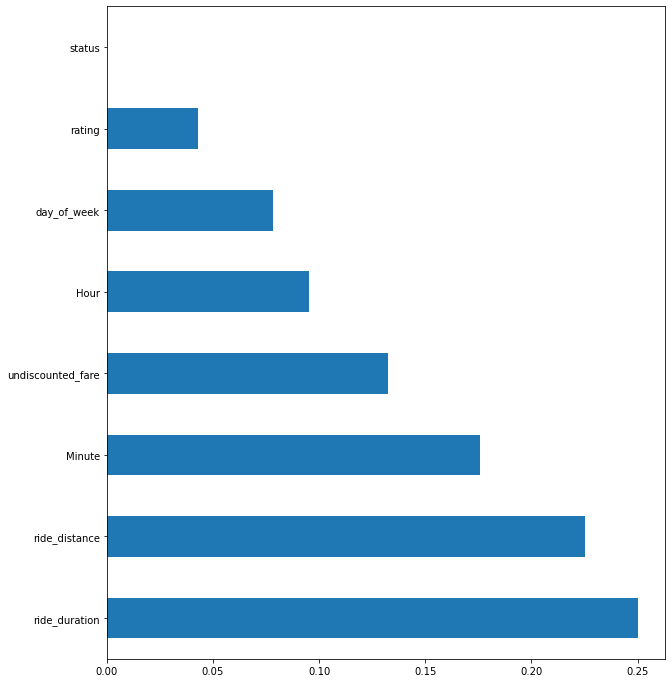

Index(['day_of_week', 'Hour', 'Minute', 'undiscounted_fare', 'rating',
       'ride_duration', 'ride_distance'],
      dtype='object')

In [204]:
def feature_importances_from_tree_based_model_():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    # Define the model to use
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestRegressor()
    model = model.fit(X_train_scaled,Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = preprocesses_df.drop('total_monthly_trips', 1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)
feature_imp_feature_names

In [205]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(preprocesses_df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = results.append(feat_imp_eval_df)
results.head(n=10)

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,11839.843291,86.044276,108.811044,0.003597,1.261476,8
Strong features,11725.355504,86.242077,108.283681,0.001374,1.341893,6
Strong features,12124.245683,87.283080,110.110152,0.001399,1.323174,4
F-test,11640.152534,85.749246,107.889539,0.000820,1.207247,6
RFE,11918.678933,86.253171,109.172702,0.005184,1.314637,7
Feature Importance,11759.646236,86.133002,108.441903,0.004616,1.253943,7


### LinearSVR

In [206]:
def run_l1_regularization():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVR(random_state=0, tol=1e-5))
    selection.fit(X_train_scaled, Y_train)

    feature_names = preprocesses_df.drop('total_monthly_trips', 1).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()
l1reg_feature_names

Index(['day_of_week', 'Hour', 'undiscounted_fare', 'ride_duration',
       'ride_distance'],
      dtype='object')

In [207]:
# Calculate and check model metrics
l1reg_eval_df = evaluate_model_on_features(preprocesses_df[l1reg_feature_names], Y)
l1reg_eval_df.index = ['linear SVR'] 

# Append to results and display
results = results.append(l1reg_eval_df)
results.head(n=10)

,MSE,MAE,RMSE,R2,MAPE,Feature Count
All features,11839.843291,86.044276,108.811044,0.003597,1.261476,8
Strong features,11725.355504,86.242077,108.283681,0.001374,1.341893,6
Strong features,12124.245683,87.283080,110.110152,0.001399,1.323174,4
F-test,11640.152534,85.749246,107.889539,0.000820,1.207247,6
RFE,11918.678933,86.253171,109.172702,0.005184,1.314637,7
Feature Importance,11759.646236,86.133002,108.441903,0.004616,1.253943,7
linear SVR,12319.547235,87.894992,110.993456,0.004565,1.283366,5


In [208]:
# Saving Most Important Features
selected_features = preprocesses_df.loc[:, ['day_of_week', 'Hour', 'undiscounted_fare', 'rating', 'ride_duration', 'ride_distance', 'total_monthly_trips']]
selected_features.to_csv("/home/moni/Desktop/Pathao Assignment/selected_features.csv", index=False)
selected_features.head()

,day_of_week,Hour,undiscounted_fare,rating,ride_duration,ride_distance,total_monthly_trips
0,2.0,8.0,132.0,4.0,1464.0,6775.0,102
1,1.0,10.0,78.0,5.0,419.0,3170.0,102
2,1.0,10.0,85.0,5.0,564.0,3655.0,102
3,2.0,19.0,93.0,5.0,922.0,4194.0,336
4,1.0,10.0,139.0,4.0,1113.0,7254.0,336


### Model Building Using PyCaret with Hyperparameter Tuning

In [209]:
##############################################
# Please Check the second notebook
##############################################

# Part 3 PoC System Design

In [210]:
print("Shape of m_assignment_completion_ratio is :{}".format(m_assignment_completion_ratio.shape))
m_assignment_completion_ratio.head()

Shape of m_assignment_completion_ratio is :(106127, 9)


,ride_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status,total_monthly_trips,ACR
0,78JE42,5221083,136.0,4.307623,860.0,6268.0,1,620.0,0.655172
1,78NN8N,5221083,63.0,5.000000,433.0,2171.0,1,620.0,0.655172
2,78T3DE,5221083,157.0,4.307623,1145.0,8474.0,1,620.0,0.655172
3,78P8KB,5221083,120.0,5.000000,1074.0,6009.0,1,620.0,0.655172
4,7989RM,5221083,104.0,4.000000,1002.0,4918.0,1,620.0,0.655172


In [211]:
le = LabelEncoder() 
m_assignment_completion_ratio['ride_id'] = le.fit_transform(m_assignment_completion_ratio['ride_id']) 
m_assignment_completion_ratio.head() 

,ride_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status,total_monthly_trips,ACR
0,34696,5221083,136.0,4.307623,860.0,6268.0,1,620.0,0.655172
1,47383,5221083,63.0,5.000000,433.0,2171.0,1,620.0,0.655172
2,66964,5221083,157.0,4.307623,1145.0,8474.0,1,620.0,0.655172
3,52430,5221083,120.0,5.000000,1074.0,6009.0,1,620.0,0.655172
4,96388,5221083,104.0,4.000000,1002.0,4918.0,1,620.0,0.655172


### Drop Nan

In [212]:
m_assignment_completion_ratio.dropna(inplace=True)

### Dataset Shuffle 

In [213]:
data = m_assignment_completion_ratio.sample(frac=1).reset_index(drop=True) 
data.shape

(56539, 9)

In [214]:
# unique driver id 
a = data['driver_id'].unique()
a

array([5341175, 5354597, 5003092, ..., 5312134, 4255170, 3040004])

### Choose 10 unique driver for simplicity

In [215]:
ten_unique_driver = [4572050,5296776,5116578,4579092,3090872,5419079,4657106,5404262,5296585,5381282]
len(ten_unique_driver)

10

In [216]:
for i, d_id in enumerate(ten_unique_driver): 

    f_df = data[data['driver_id']==4572050]
    
    if i != 0: 
        r_df = data[data['driver_id']==d_id] 
        
        f_df = pd.concat([f_df, r_df])
        

In [217]:
final_df = f_df.copy()
final_df = final_df.reset_index(drop=True)
final_df.shape

(66, 9)

In [218]:
final_df

,ride_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status,total_monthly_trips,ACR
0,69389,4572050,86.0,4.000000,782.0,3716.0,1,118.0,0.652778
1,18568,4572050,74.0,4.307623,645.0,2486.0,1,118.0,0.652778
2,35607,4572050,105.0,3.000000,799.0,4973.0,1,118.0,0.652778
3,194,4572050,69.0,4.307623,520.0,2584.0,1,118.0,0.652778
4,39756,4572050,72.0,5.000000,509.0,2804.0,1,118.0,0.652778
...,...,...,...,...,...,...,...,...,...
61,26200,5381282,68.0,5.000000,434.0,2511.0,1,25.0,0.791667
62,23295,5381282,56.0,5.000000,298.0,1746.0,1,25.0,0.791667
63,21694,5381282,77.0,4.307623,437.0,3144.0,1,25.0,0.791667
64,32334,5381282,102.0,4.307623,713.0,4831.0,1,25.0,0.791667


In [219]:
d = {4572050:0, 5296776:1, 5116578:2, 4579092:3, 3090872:4, 5419079:5, 4657106:6, 5404262:7, 5296585:8, 5381282:9}

In [220]:
final_df['driver_id'] = final_df['driver_id'].map(d)
final_df

,ride_id,driver_id,undiscounted_fare,rating,ride_duration,ride_distance,status,total_monthly_trips,ACR
0,69389,0,86.0,4.000000,782.0,3716.0,1,118.0,0.652778
1,18568,0,74.0,4.307623,645.0,2486.0,1,118.0,0.652778
2,35607,0,105.0,3.000000,799.0,4973.0,1,118.0,0.652778
3,194,0,69.0,4.307623,520.0,2584.0,1,118.0,0.652778
4,39756,0,72.0,5.000000,509.0,2804.0,1,118.0,0.652778
...,...,...,...,...,...,...,...,...,...
61,26200,9,68.0,5.000000,434.0,2511.0,1,25.0,0.791667
62,23295,9,56.0,5.000000,298.0,1746.0,1,25.0,0.791667
63,21694,9,77.0,4.307623,437.0,3144.0,1,25.0,0.791667
64,32334,9,102.0,4.307623,713.0,4831.0,1,25.0,0.791667


### Dividing dataset

In [221]:
X = final_df.drop('driver_id', axis=1).values
y = final_df['driver_id'].values 
print("Shape of X is :{} \nShape of y is :{}".format(X.shape, y.shape)) 

Shape of X is :(66, 8) 
Shape of y is :(66,)


In [222]:
X_train, xtest, Y_train, ytest  = train_test_split(X, y, random_state=42, test_size=0.1)
Xtrain, xvalid, Ytrain, yvalid = train_test_split(X_train, Y_train, random_state=42, test_size=.1)
print("Shape of Xtrain :{} \nShape of Ytrain :{} \nShape of xvalid :{} \nShape of yvalid :{} \nShape of xtest :{} \nShape of ytest :{}".format(Xtrain.shape, Ytrain.shape, xvalid.shape, yvalid.shape, xtest.shape, ytest.shape))

Shape of Xtrain :(53, 8) 
Shape of Ytrain :(53,) 
Shape of xvalid :(6, 8) 
Shape of yvalid :(6,) 
Shape of xtest :(7, 8) 
Shape of ytest :(7,)


### Converting to Tensor

In [223]:
Xtrain = torch.FloatTensor(Xtrain)
xtest = torch.FloatTensor(xtest)
xvalid = torch.FloatTensor(xvalid)
Ytrain = torch.LongTensor(Ytrain)
ytest = torch.LongTensor(ytest)
yvalid = torch.LongTensor(yvalid)

### Model 

In [224]:
class Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=50, hidden_layer2=60, output_features=10):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [225]:
Model = Model()

### Define Optimizer and Criterion

In [226]:
#optimizer = torch.optim.SGD(Model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(Model.parameters(), lr=0.01)
#loss = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

### Training Model

In [227]:
epochs = 1000
train_losses = []
valid_losses = []
train_correct = []
valid_correct = []

for epoch in range(epochs):
    out1 = Model.forward(Xtrain)
    train_loss = criterion(out1, Ytrain)
    train_losses.append(train_loss)
    
    out2 = Model.forward(xvalid)
    valid_loss = criterion(out2, yvalid)
    valid_losses.append(valid_loss)
    
    #print("Epoch {epoch:2}, Loss = {loss.item():10.8f}")

    optimizer.zero_grad()
    train_loss.backward()
    valid_loss.backward()
    optimizer.step()
    
    #train_correct += (out1 == Ytrain).float().sum()
    #valid_correct += (out2 == yvalid).float().sum()
    
    print(f'Epoch: {epoch:2}  Train_loss: {train_loss.item():10.8f}  Valid_loss:{valid_loss.item():10.8f} ')

Epoch:  0  Train_loss: 1003.87719727  Valid_loss:948.90106201 
Epoch:  1  Train_loss: 429.24176025  Valid_loss:191.73188782 
Epoch:  2  Train_loss: 258.08441162  Valid_loss:115.84957123 
Epoch:  3  Train_loss: 1224.71472168  Valid_loss:1348.52050781 
Epoch:  4  Train_loss: 441.74658203  Valid_loss:193.92736816 
Epoch:  5  Train_loss: 920.21478271  Valid_loss:400.05337524 
Epoch:  6  Train_loss: 1212.76391602  Valid_loss:525.45550537 
Epoch:  7  Train_loss: 1353.04528809  Valid_loss:585.05670166 
Epoch:  8  Train_loss: 1367.33728027  Valid_loss:590.19329834 
Epoch:  9  Train_loss: 1279.39562988  Valid_loss:552.04058838 
Epoch: 10  Train_loss: 1111.26843262  Valid_loss:480.15518188 
Epoch: 11  Train_loss: 861.58270264  Valid_loss:373.16616821 
Epoch: 12  Train_loss: 555.39324951  Valid_loss:240.99092102 
Epoch: 13  Train_loss: 206.41763306  Valid_loss:90.21602631 
Epoch: 14  Train_loss: 780.50701904  Valid_loss:850.63281250 
Epoch: 15  Train_loss: 188.07302856  Valid_loss:193.22875977 
E

### Train and Valid Loss

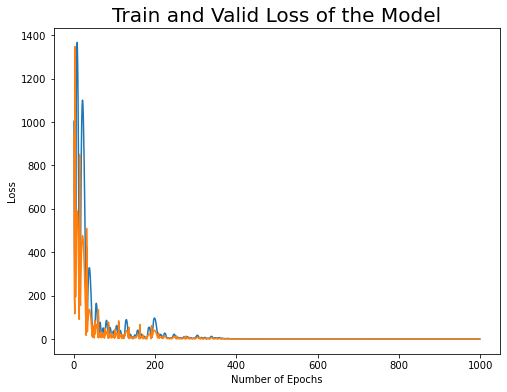

In [229]:
plt.figure(figsize=(8, 6))
plt.plot(range(1000), train_losses, label="train loss")
plt.title("Train and Valid Loss of the Model", fontsize=20)
plt.xlabel("Number of Epochs") 
plt.ylabel("Loss")

plt.plot(range(1000), valid_losses, label="valid loss") 

### Predict

In [230]:
predict_out = Model(xtest) 
_, predict_y = torch.max(predict_out, 1) 

In [231]:
predict_y 

tensor([9, 9, 0, 0, 0, 9, 0])

In [232]:
print('prediction accuracy :', accuracy_score(ytest.data, predict_y.data))

prediction accuracy : 1.0


In [ ]:
Note: There are lots of opportunity to improve the model performance in both task 2 and 3. And also can apply different Data Science and Software Engineering technique
    within 4 days applying all the process almost impossible. 